<a href="https://colab.research.google.com/github/steverogersneha/Iris-Neural-Network/blob/master/Copy_of_01_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

This is a machine learning problem where the input and the output should be floating point numbers. This is the most natural use of artificial neural networks.

## Demand prediction task: Bicycle sharing stations

Let us predict which bicycle stations are too full or too empty. If we can accurately predict this we can transport the bicycles from full stations to the empty ones and therefore provide efficient citizen mobility with possibly smaller number of bicycles than expected.

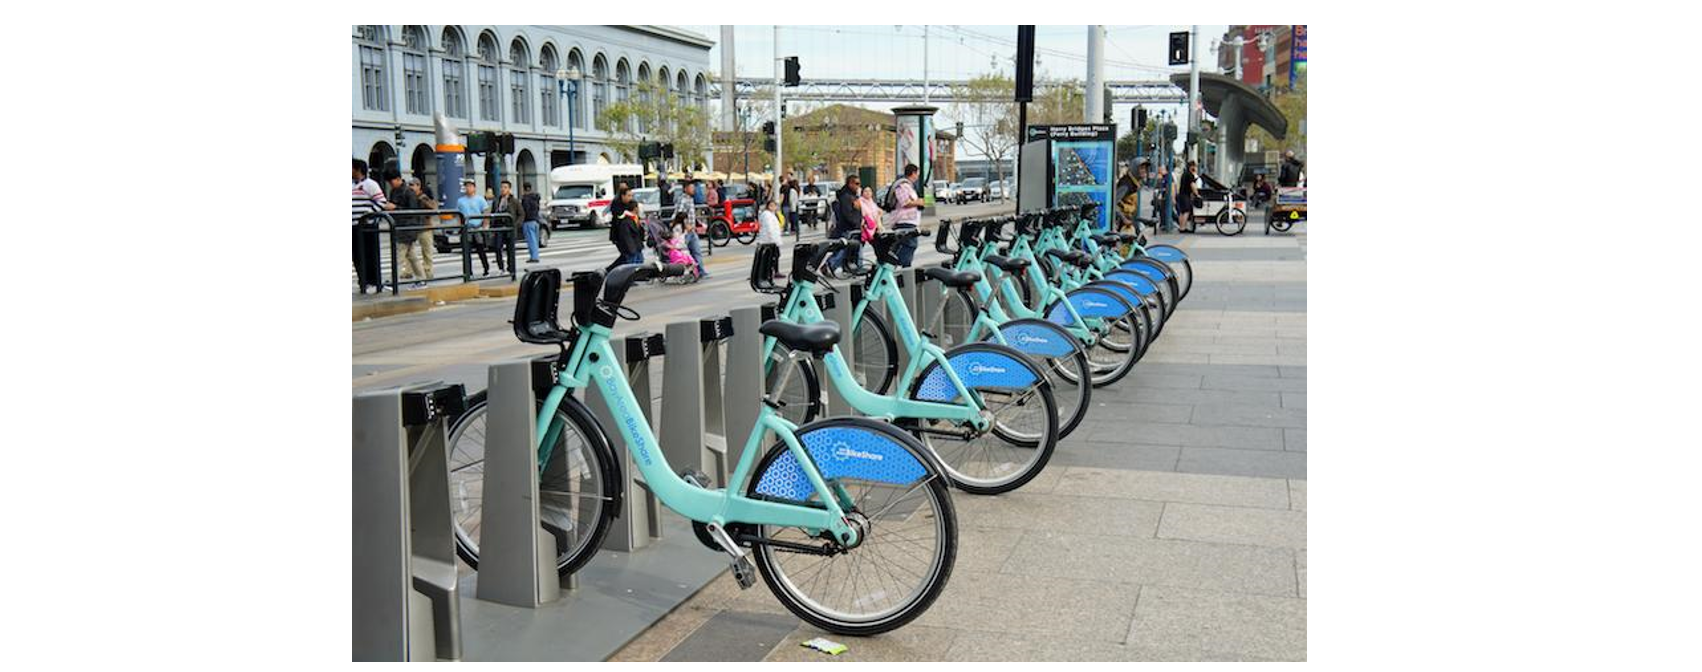

Let us import the data for bike sharing stations in San Francisco.

In [2]:
import pandas as pd
x = pd.read_csv("https://repo.ijs.si/hribarr/tetramax_keras_data/-/raw/master/time_and_weather.csv")
y = pd.read_csv("https://repo.ijs.si/hribarr/tetramax_keras_data/-/raw/master/num_of_bicycles.csv")

In [3]:
x

,year,day_of_the_year,day_of_the_week,hour,mean_temperature_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover
0,2014,99,2,13,59.0,75.0,30.06,10.0,8.0,49.0,0.0,4.0
1,2014,99,2,14,59.0,75.0,30.06,10.0,8.0,49.0,0.0,4.0
2,2014,99,2,15,59.0,75.0,30.06,10.0,8.0,49.0,0.0,4.0
3,2014,99,2,16,59.0,75.0,30.06,10.0,8.0,49.0,0.0,4.0
4,2014,99,2,17,59.0,75.0,30.06,10.0,8.0,49.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10458,2015,243,0,19,69.0,67.0,29.91,10.0,9.0,21.0,0.0,1.0
10459,2015,243,0,20,69.0,67.0,29.91,10.0,9.0,21.0,0.0,1.0
10460,2015,243,0,21,69.0,67.0,29.91,10.0,9.0,21.0,0.0,1.0
10461,2015,243,0,22,69.0,67.0,29.91,10.0,9.0,21.0,0.0,1.0


In [4]:
y

,station_0,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10,station_11,station_12,station_13,station_14,station_15,station_16,station_17,station_18,station_19,station_20,station_21,station_22,station_23,station_24,station_25,station_26,station_27,station_28,station_29,station_30,station_31,station_32,station_33,station_34,station_35,station_36,station_37,station_38,station_39,station_40,station_41,station_42,station_43,station_44,station_45,station_46,station_47,station_48,station_49,station_50,station_51,station_52,station_53,station_54,station_55,station_56,station_57,station_58,station_59,station_60,station_61,station_62,station_63,station_64,station_65,station_66,station_67,station_68,station_69
0,0.370370,0.533333,0.454545,0.631579,0.400000,0.600000,0.533333,0.533333,0.466667,0.631579,0.526316,0.600000,0.578947,0.600000,0.533333,0.629630,0.400000,0.466667,0.666667,0.466667,0.600000,0.434783,0.478261,0.733333,0.666667,0.454545,0.400000,0.478261,0.545455,0.666667,0.454545,0.533333,0.666667,0.400000,0.666667,0.466667,0.631579,0.733333,0.368421,0.608696,0.684211,0.421053,0.200000,0.434783,0.368421,0.600000,0.388889,0.173913,0.666667,0.777778,0.421053,0.210526,0.733333,0.600000,0.368421,0.185185,0.842105,0.217391,0.157895,0.368421,0.304348,0.333333,0.478261,0.842105,0.578947,0.666667,0.533333,0.400000,0.466667,0.133333
1,0.370370,0.466667,0.454545,0.631579,0.400000,0.600000,0.533333,0.533333,0.466667,0.578947,0.526316,0.600000,0.578947,0.600000,0.533333,0.629630,0.400000,0.466667,0.666667,0.466667,0.600000,0.434783,0.478261,0.733333,0.666667,0.454545,0.400000,0.478261,0.454545,0.733333,0.454545,0.533333,0.600000,0.266667,0.533333,0.400000,0.631579,0.800000,0.421053,0.434783,0.789474,0.315789,0.400000,0.434783,0.421053,0.533333,0.388889,0.130435,0.333333,0.777778,0.368421,0.315789,0.733333,0.733333,0.315789,0.185185,0.789474,0.217391,0.105263,0.421053,0.347826,0.333333,0.521739,1.000000,0.578947,0.703704,0.533333,0.466667,0.466667,0.200000
2,0.370370,0.533333,0.454545,0.631579,0.400000,0.600000,0.533333,0.600000,0.466667,0.578947,0.526316,0.600000,0.578947,0.600000,0.533333,0.629630,0.400000,0.466667,0.666667,0.466667,0.600000,0.434783,0.521739,0.733333,0.666667,0.454545,0.400000,0.478261,0.454545,0.733333,0.363636,0.533333,0.466667,0.333333,0.466667,0.400000,0.526316,0.800000,0.421053,0.521739,0.789474,0.526316,0.400000,0.434783,0.473684,0.533333,0.333333,0.130435,0.533333,0.925926,0.473684,0.368421,0.800000,0.733333,0.368421,0.111111,0.736842,0.173913,0.210526,0.210526,0.391304,0.400000,0.434783,0.842105,0.631579,0.740741,0.533333,0.400000,0.466667,0.200000
3,0.333333,0.533333,0.454545,0.631579,0.400000,0.600000,0.533333,0.533333,0.400000,0.578947,0.526316,0.600000,0.526316,0.600000,0.533333,0.629630,0.400000,0.466667,0.666667,0.466667,0.600000,0.391304,0.521739,0.733333,0.600000,0.454545,0.400000,0.478261,0.454545,0.733333,0.363636,0.533333,0.466667,0.400000,0.333333,0.400000,0.578947,0.800000,0.421053,0.652174,0.736842,0.526316,0.466667,0.434783,0.421053,0.533333,0.333333,0.086957,1.000000,0.444444,0.421053,0.263158,0.600000,0.733333,0.368421,0.111111,0.684211,0.260870,0.315789,0.157895,0.434783,0.466667,0.434783,0.736842,0.578947,0.703704,0.533333,0.266667,0.466667,0.200000
4,0.592593,0.533333,0.272727,0.578947,0.400000,0.600000,0.533333,0.533333,0.400000,0.578947,0.578947,0.600000,0.526316,0.533333,0.533333,0.629630,0.400000,0.466667,0.666667,0.466667,0.466667,0.478261,0.608696,0.800000,0.466667,0.363636,0.400000,0.478261,0.454545,0.733333,0.272727,0.533333,0.200000,0.400000,0.400000,0.333333,0.473684,0.866667,0.421053,0.913043,0.526316,0.631579,0.466667,0.521739,0.315789,0.466667,0.333333,0.130435,0.533333,0.444444,0.473684,0.421053,0.533333,0.866667,0.263158,0.148148,0.736842,0.130435,0.157895,0.105263,0.478261,0.466667,0.217391,0.684211,0.368421,0.407407,0.533333,0.200000,0.466667,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Now we build a neural network model that will be able to map time and weather data to the number of bikes for each station.

How should input and output look like?

In [5]:
input_dim = x.columns.size
output_dim =y.columns.size
print("input_dim =", input_dim, " and  output_dim =", output_dim)

input_dim = 12  and  output_dim = 70


We build a basic model.

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout


How much parameters does our model have?

In [7]:
model = Sequential()
model.add(Dense(128,input_dim = input_dim, activation= "relu"))
model.add(Dense(output_dim))

Lets try it out on our data.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 70)                9030      
                                                                 
Total params: 10,694
Trainable params: 10,694
Non-trainable params: 0
_________________________________________________________________


In [9]:
x.values[:1]
model.predict(x.values[:1])
y.values[:1]

array([[0.37037037, 0.53333333, 0.45454545, 0.63157895, 0.4       ,
        0.6       , 0.53333333, 0.53333333, 0.46666667, 0.63157895,
        0.52631579, 0.6       , 0.57894737, 0.6       , 0.53333333,
        0.62962963, 0.4       , 0.46666667, 0.66666667, 0.46666667,
        0.6       , 0.43478261, 0.47826087, 0.73333333, 0.66666667,
        0.45454545, 0.4       , 0.47826087, 0.54545455, 0.66666667,
        0.45454545, 0.53333333, 0.66666667, 0.4       , 0.66666667,
        0.46666667, 0.63157895, 0.73333333, 0.36842105, 0.60869565,
        0.68421053, 0.42105263, 0.2       , 0.43478261, 0.36842105,
        0.6       , 0.38888889, 0.17391304, 0.66666667, 0.77777778,
        0.42105263, 0.21052632, 0.73333333, 0.6       , 0.36842105,
        0.18518519, 0.84210526, 0.2173913 , 0.15789474, 0.36842105,
        0.30434783, 0.33333333, 0.47826087, 0.84210526, 0.57894737,
        0.66666667, 0.53333333, 0.4       , 0.46666667, 0.13333333]])

## Training

This is an optimization procedure during which parameters of the network are changed so that the output of the model becomes as close as possible to the desired output.

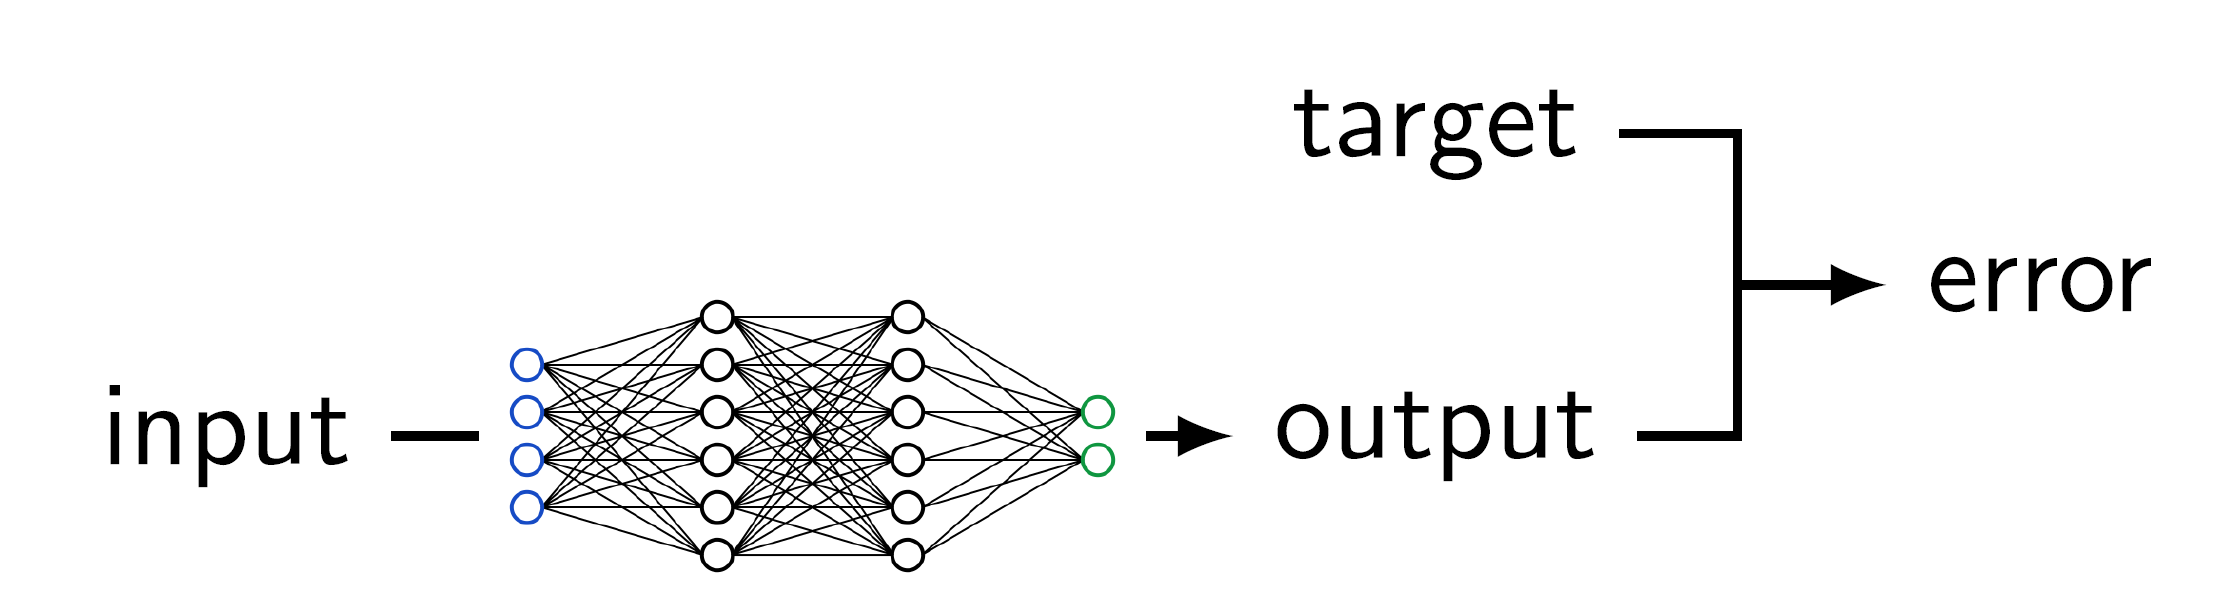

First we need to decide what is "close" to desired output. In this case it makes sense we minimize mean absolute error.

In [10]:
model.compile(loss="mae")

Now we can preform optimization and we search for parameters of the network that produce the lowest mean absolute error.

In [11]:
model.fit(x=x,y=y,epochs=50)

Epoch 1/50
327/327 [==============================] - 1s 2ms/step - loss: 8.8315
Epoch 2/50
327/327 [==============================] - 1s 2ms/step - loss: 5.8070
Epoch 3/50
327/327 [==============================] - 1s 2ms/step - loss: 4.8612
Epoch 4/50
327/327 [==============================] - 1s 2ms/step - loss: 4.1904
Epoch 5/50
327/327 [==============================] - 1s 2ms/step - loss: 3.5811
Epoch 6/50
327/327 [==============================] - 1s 2ms/step - loss: 3.0798
Epoch 7/50
327/327 [==============================] - 1s 2ms/step - loss: 2.6223
Epoch 8/50
327/327 [==============================] - 1s 2ms/step - loss: 2.2416
Epoch 9/50
327/327 [==============================] - 1s 2ms/step - loss: 1.9555
Epoch 10/50
327/327 [==============================] - 1s 2ms/step - loss: 1.6619
Epoch 11/50
327/327 [==============================] - 1s 2ms/step - loss: 1.4500
Epoch 12/50
327/327 [==============================] - 1s 2ms/step - loss: 1.2087
Epoch 13/50
327/327 [====

Let us now check how the output of the trained model looks like when taking an instance from the data set as an input.

## Model validation and overfitting

Overfitting is a modeling error that occurs when a model has learned
too much.
* model capacity is so high that noise is being modeled
* model doesn't generalize well from our training data to unseen data

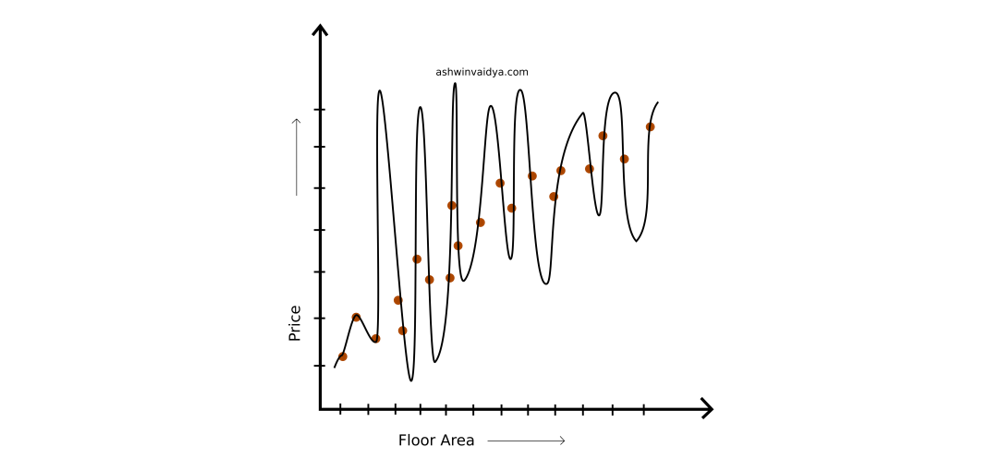

Overfitting is a complicated phenomenon. It has to do with
* model capacity
* data set distribution
* complexity of an underlying problem

The most bulletproof way to know if overfitting happened is to measure error on unseen data
* Test error

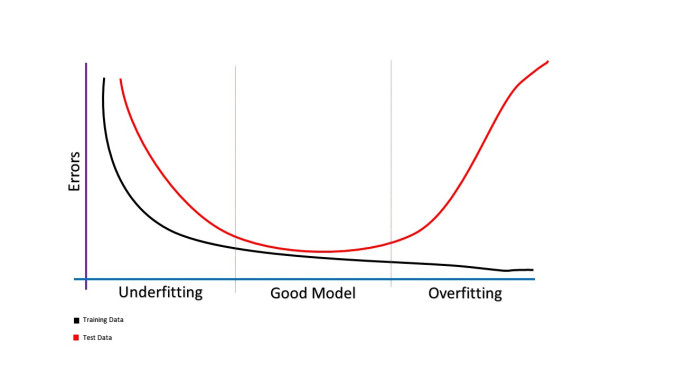

To properly measure how well will our model works in real life we need to test it on data that was not used during training.

Let us split our data set to train set that will contain 80% of instances and test set with the remaining 20% of instances.

In [12]:
from sklearn.model_selection import train_test_split
data = pd.merge(x, y, left_index=True, right_index=True)
train, test = train_test_split(data, test_size=0.2)
columns_in_x = [col for col in data.columns if not col.startswith("station_")]
columns_in_y = [col for col in data.columns if col.startswith("station_")]
x_train = train[columns_in_x]
y_train = train[columns_in_y]
x_test = test[columns_in_x]
y_test = test[columns_in_y]

We repeat the training by now using only training set for training and test set to evaluate the model.

In [14]:
model = Sequential()
model.add(Dense(128,input_dim = input_dim, activation= "relu"))
model.add(Dense(output_dim))

model.compile(loss="mae")
history = model.fit(x=x_train,y=y_train,epochs = 50,validation_data = (x_test,y_test))

Epoch 1/50
262/262 [==============================] - 1s 3ms/step - loss: 10.3082 - val_loss: 7.3687
Epoch 2/50
262/262 [==============================] - 1s 5ms/step - loss: 6.6385 - val_loss: 5.7725
Epoch 3/50
262/262 [==============================] - 1s 4ms/step - loss: 5.7771 - val_loss: 5.2236
Epoch 4/50
262/262 [==============================] - 1s 4ms/step - loss: 5.0274 - val_loss: 4.5210
Epoch 5/50
262/262 [==============================] - 1s 2ms/step - loss: 4.4567 - val_loss: 4.3235
Epoch 6/50
262/262 [==============================] - 1s 2ms/step - loss: 3.9546 - val_loss: 3.8407
Epoch 7/50
262/262 [==============================] - 1s 2ms/step - loss: 3.4818 - val_loss: 3.4341
Epoch 8/50
262/262 [==============================] - 1s 2ms/step - loss: 3.0564 - val_loss: 2.8321
Epoch 9/50
262/262 [==============================] - 1s 2ms/step - loss: 2.6982 - val_loss: 2.5777
Epoch 10/50
262/262 [==============================] - 1s 2ms/step - loss: 2.4048 - val_loss: 2.310

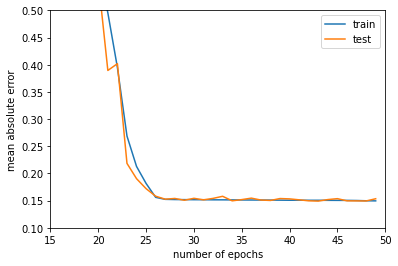

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlim([15, 50])
plt.ylim([0.1, 0.5])
plt.xlabel("number of epochs")
plt.ylabel("mean absolute error")
plt.legend()
plt.show()

### Regularization

AI problems normally require high capacity models.
* depth due to problem complexity
* width to ensure information flow

To reduce overfitting we can handicap the network without reducing its size.
* constraints on the structure of the network
* disruptions in the training phase

We call such techniques regularizations.
* **weight decay**
* **dropout**
* early stopping
* parameter sharing
* batch/layer normalization
* data augmentation
* semi-supervised learning

#### Dropout

The key idea of Dropout is to randomly drop nodes (along with their connections) from the neural network during training. This prevents units from co-adapting too much and forces the network to adopt more distributed representations more resilient to noise.

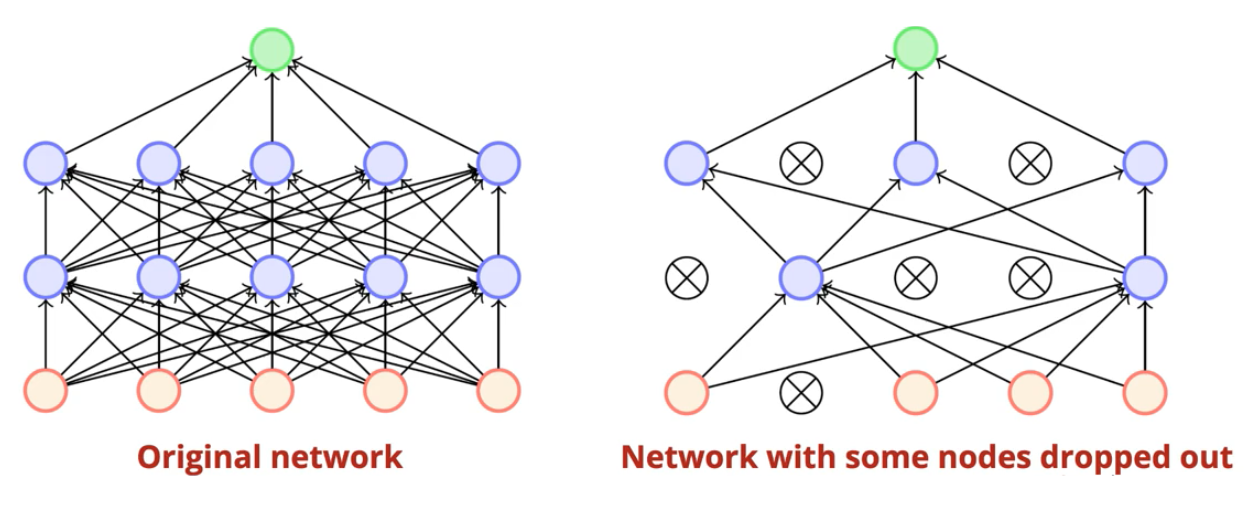

In Keras Dropout is implemented as a layer that simply sets random nodes to zero.

In [27]:
model = Sequential()
model.add(Dense(128,input_dim = input_dim, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(output_dim))

model.compile(loss="mae")
history = model.fit(x=x_train,y=y_train,epochs = 5,validation_data = (x_test,y_test))

Epoch 1/5
262/262 [==============================] - 1s 3ms/step - loss: 20.1494 - val_loss: 0.2185
Epoch 2/5
262/262 [==============================] - 1s 2ms/step - loss: 0.1894 - val_loss: 0.1626
Epoch 3/5
262/262 [==============================] - 1s 2ms/step - loss: 0.1631 - val_loss: 0.1532
Epoch 4/5
262/262 [==============================] - 1s 2ms/step - loss: 0.1544 - val_loss: 0.1528
Epoch 5/5
262/262 [==============================] - 1s 2ms/step - loss: 0.1520 - val_loss: 0.1517


Lets try dropout.

We train the model that includes dropout which means that random nodes in the network get droped in training phase but not in prediction phase.

#### Weight decay

One of the oldest regularization techniques is weight decay and it is still very much in use today. It works by adding some norm of the weight matrix W to the loss function.

* L2 weight decay

$\text{loss} = \text{error loss} + \lambda \lVert W \rVert^2_2 = \text{error loss} + \lambda \sum_{ij} W_{ij}^2$

* L1 weight decay

$\text{loss} = \text{error loss} + \lambda \lVert W \rVert_1 = \text{error loss} + \lambda \sum_{ij} \lvert W_{ij}\rvert$

This forces neural network to adopt connections that are more sparse than usual or in other words making the network less dense.

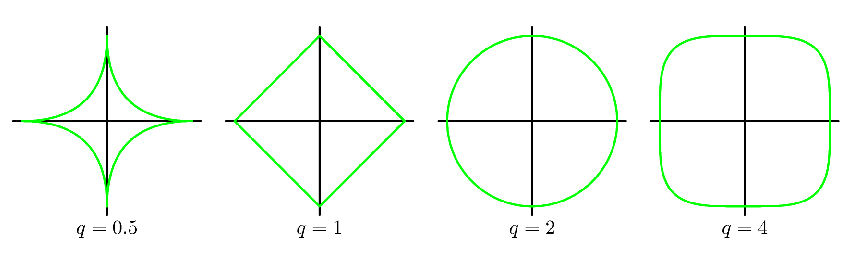

This type of regularization can be simply added to the model by adding an argument to the Layer (eg. Dense).

In this way the regularization constant is $\lambda = 0.01$, the default value. We can change this by using a regulazer object.

## Data preprocessing and feature engineering

One of the advertised advantages of deep learning is the low effort needed for data preparation and feature extraction. It is expected that the network has enough capacity to transform input to appropriate form that is the most informative for prediction.

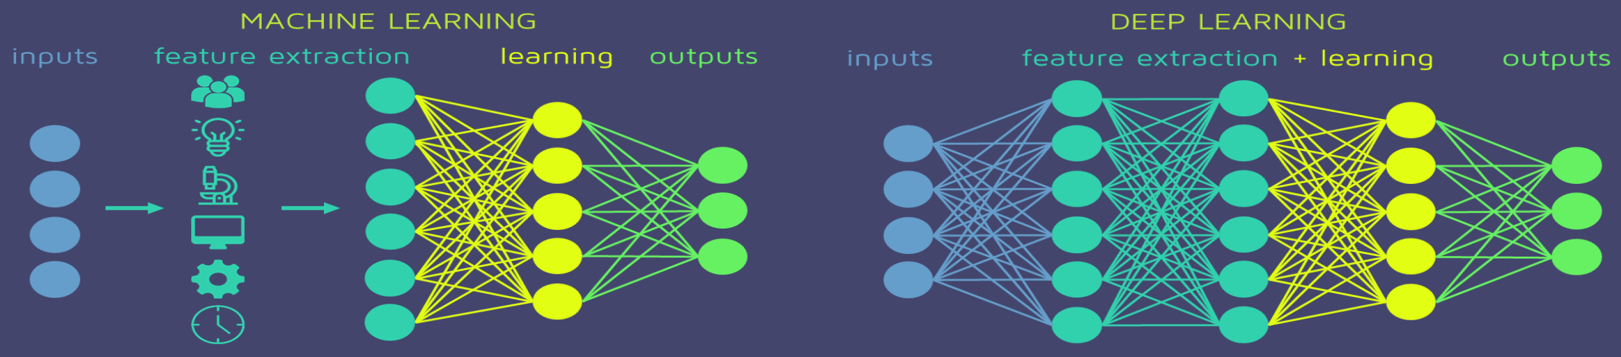

However, in practice we can substantially reduce training time (and even error) if we invest into proper data preparation.

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation="relu"))
model.add(Dense(output_dim))
model.compile(loss="mae")
history = model.fit(x=x_train, y=y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
262/262 [==============================] - 1s 3ms/step - loss: 11.5856 - val_loss: 7.1489
Epoch 2/50
262/262 [==============================] - 1s 2ms/step - loss: 6.3195 - val_loss: 6.0043
Epoch 3/50
262/262 [==============================] - 1s 3ms/step - loss: 5.4041 - val_loss: 4.9976
Epoch 4/50
262/262 [==============================] - 1s 3ms/step - loss: 4.8319 - val_loss: 5.3759
Epoch 5/50
262/262 [==============================] - 1s 2ms/step - loss: 4.2049 - val_loss: 4.4269
Epoch 6/50
262/262 [==============================] - 1s 2ms/step - loss: 3.5859 - val_loss: 3.2259
Epoch 7/50
262/262 [==============================] - 1s 2ms/step - loss: 3.0667 - val_loss: 2.5865
Epoch 8/50
262/262 [==============================] - 1s 2ms/step - loss: 2.6214 - val_loss: 2.5376
Epoch 9/50
262/262 [==============================] - 1s 2ms/step - loss: 2.2971 - val_loss: 2.2561
Epoch 10/50
262/262 [==============================] - 1s 2ms/step - loss: 1.9912 - val_loss: 1.965

In [29]:
y_prediction = model.predict(x)

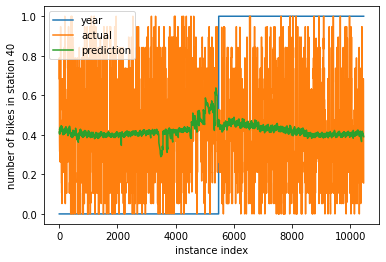

In [32]:
station = 40
plt.plot(x.year.values[:] - 2014, label="year")
plt.plot(y.values[:, station], label="actual")
plt.plot(y_prediction[:, station], label="prediction")
plt.xlabel("instance index")
plt.ylabel("number of bikes in station {}".format(station))
plt.legend()
plt.show()

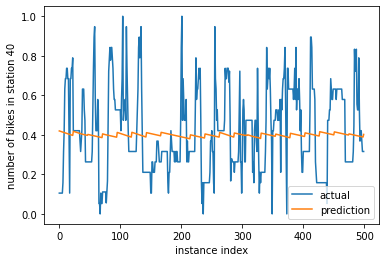

In [33]:
station = 40
plt.plot(y.values[1000:1500, station], label="actual")
plt.plot(y_prediction[1000:1500, station], label="prediction")
plt.legend()
plt.xlabel("instance index")
plt.ylabel("number of bikes in station {}".format(station))
plt.show()

### Data normalization

Now we have input data with features of very different magnitudes. `year` is of order 1000, `day of the year` of order 100, `temperature` of order 10 and so on.

It turns out that neural networks work best if inputs and outputs are approximately in interval $[-1, 1]$, in other words of order 1. This has to do also with the way initial parameters (before training) are constructed. 

Here we chose to scale features so they belong to interval $[0, 1]$ exactly, ie. smallest value is 0 and largest 1.

In [41]:
x_train_min = x_train.min()
x_train_max = x_train.max()
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)
x_normalized = (x - x_train_min) / (x_train_max - x_train_min)

In [35]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation="relu"))
model.add(Dense(output_dim))
model.compile(loss="mae")
history = model.fit(x=x_train_normalized, y=y_train, epochs=50, validation_data=(x_test_normalized, y_test))

Epoch 1/50
262/262 [==============================] - 1s 3ms/step - loss: 0.1614 - val_loss: 0.1485
Epoch 2/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1460 - val_loss: 0.1461
Epoch 3/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1436 - val_loss: 0.1440
Epoch 4/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1414 - val_loss: 0.1423
Epoch 5/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1395 - val_loss: 0.1403
Epoch 6/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1381 - val_loss: 0.1388
Epoch 7/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1370 - val_loss: 0.1381
Epoch 8/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1362 - val_loss: 0.1380
Epoch 9/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1355 - val_loss: 0.1365
Epoch 10/50
262/262 [==============================] - 1s 2ms/step - loss: 0.1349 - val_loss: 0.1362

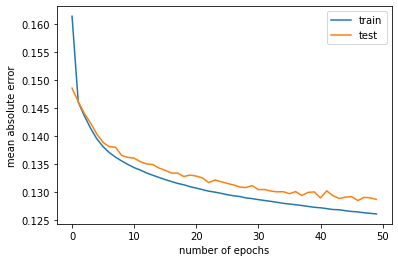

In [36]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("number of epochs")
plt.ylabel("mean absolute error")
plt.legend()
plt.show()

In [37]:
y_prediction = model.predict(x_normalized)

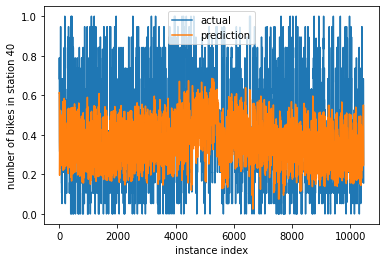

In [38]:
station = 40
plt.plot(y.values[:, station], label="actual")
plt.plot(y_prediction[:, station], label="prediction")
plt.legend()
plt.xlabel("instance index")
plt.ylabel("number of bikes in station {}".format(station))
plt.show()

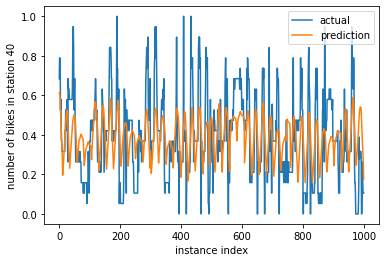

In [39]:
station = 40
plt.plot(y.values[:1000, station], label="actual")
plt.plot(y_prediction[:1000, station], label="prediction")
plt.legend()
plt.xlabel("instance index")
plt.ylabel("number of bikes in station {}".format(station))
plt.show()

### Time features

**Making features more continuous:** Now, year is not that descriptive, it has only two possible values. We can transform it so that the model can use it more easily and capture a possible trend. The same can be done for day of the week (by adding hour) and also day of the year.

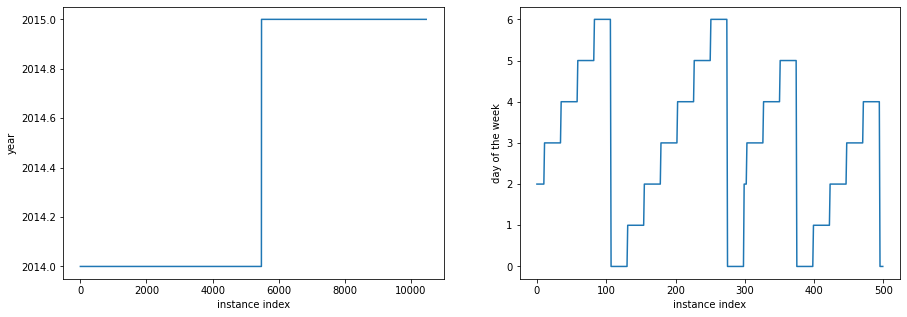

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(x.year)
ax1.set_xlabel("instance index")
ax1.set_ylabel("year")
ax2.plot(x.day_of_the_week.values[:500])
ax2.set_xlabel("instance index")
ax2.set_ylabel("day of the week")
plt.show()

Let us define new time features that will start with `time_` and will be a smoothed version of already included features.

In [44]:
# Below we do not take account of leap years (2014 and 2015 are not leap years)
# or daylight saving time (with hope model can learn to model this).
x["time_of_the_day"] = x.hour / 24
x["time_of_the_week"] = ( x.day_of_the_week + x.time_of_the_day ) / 7
x["time_of_the_year"] = ( x.day_of_the_year - 1 + x.time_of_the_day ) / 365
x["time_in_years"] = x.year + x.time_of_the_year
x["time_in_years"] = x.time_in_years - x.time_in_years.min()

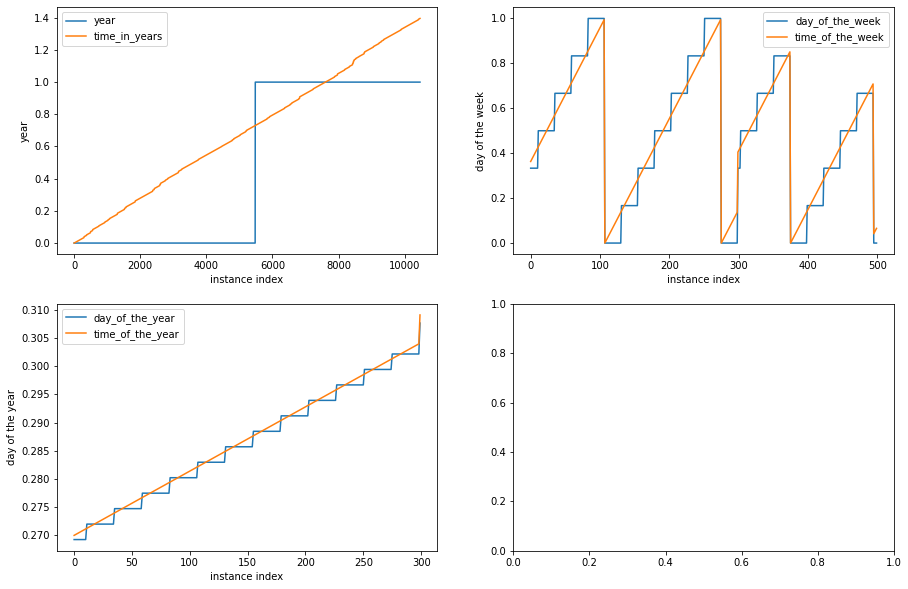

In [45]:
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, figsize=(15, 10))
ax00.plot(x_normalized.year, label="year")
ax00.plot(x.time_in_years, label="time_in_years")
ax00.set_xlabel("instance index")
ax00.set_ylabel("year")
ax00.legend()
ax01.plot(x_normalized.day_of_the_week.values[:500], label="day_of_the_week")
ax01.plot(x.time_of_the_week.values[:500], label="time_of_the_week")
ax01.set_xlabel("instance index")
ax01.set_ylabel("day of the week")
ax01.legend()
ax10.plot(x_normalized.day_of_the_year.values[:300], label="day_of_the_year")
ax10.plot(x.time_of_the_year.values[:300], label="time_of_the_year")
ax10.set_xlabel("instance index")
ax10.set_ylabel("day of the year")
ax10.legend()
plt.show()

First let us clean up our data set a bit before continuing.

In [46]:
x = x.drop(["year", "day_of_the_year", "day_of_the_week", "hour"], axis=1)

**Properly encoding periodic features:**  If we look at day of the week, Sunday and Monday are six days apart by value even though they are only one day apart in real life. The same problem is present for hour of the day and day of the year. We could use cyclic coordinates to remedy this.

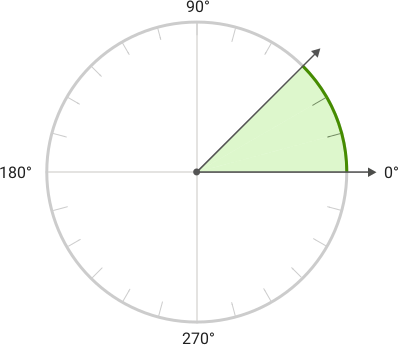

Now we build cyclic coordinates for periodic time features.

In [47]:
import numpy as np
periodic_columns = ["time_of_the_day", "time_of_the_week", "time_of_the_year"]
for column in periodic_columns:
    x[column + "_sin"] = np.sin(2 * np.pi * x[column])
    x[column + "_cos"] = np.cos(2 * np.pi * x[column])
x = x.drop(periodic_columns, axis=1)

Now we resplit the data set with newly constructed features to training and test set and normalize the weather features as before.

In [48]:
data = pd.merge(x, y, left_index=True, right_index=True)
train, test = train_test_split(data, test_size=0.2)
columns_in_x = [col for col in data.columns if not col.startswith("station_")]
columns_in_y = [col for col in data.columns if col.startswith("station_")]
x_train = train[columns_in_x]
y_train = train[columns_in_y]
x_test = test[columns_in_x]
y_test = test[columns_in_y]

columns_for_normalization = ['mean_temperature_f', 'mean_humidity',
                             'mean_sea_level_pressure_inches',  
                             'mean_visibility_miles', 'mean_wind_speed_mph', 
                             'max_gust_speed_mph', 'precipitation_inches', 
                             'cloud_cover', 'time_in_years']

x_train_normalized = x_train.copy()
x_test_normalized = x_test.copy()
x_normalized = x.copy()
x_train_min = x_train[columns_for_normalization].min()
x_train_max = x_train[columns_for_normalization].max()
x_train_normalized[columns_for_normalization] = (x_train[columns_for_normalization] - x_train_min) / (x_train_max - x_train_min)
x_test_normalized[columns_for_normalization] = (x_test[columns_for_normalization] - x_train_min) / (x_train_max - x_train_min)
x_normalized[columns_for_normalization] = (x[columns_for_normalization] - x_train_min) / (x_train_max - x_train_min)

In [49]:
input_dim = x.columns.size
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation="relu"))
model.add(Dense(output_dim))
model.compile(loss="mae")
history = model.fit(x=x_train_normalized, y=y_train, epochs=100, validation_data=(x_test_normalized, y_test))

Epoch 1/100
262/262 [==============================] - 1s 3ms/step - loss: 0.1586 - val_loss: 0.1409
Epoch 2/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1382 - val_loss: 0.1365
Epoch 3/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1351 - val_loss: 0.1343
Epoch 4/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1331 - val_loss: 0.1329
Epoch 5/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1316 - val_loss: 0.1319
Epoch 6/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1304 - val_loss: 0.1305
Epoch 7/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1294 - val_loss: 0.1296
Epoch 8/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1284 - val_loss: 0.1291
Epoch 9/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1276 - val_loss: 0.1279
Epoch 10/100
262/262 [==============================] - 1s 2ms/step - loss: 0.1269 - val_lo

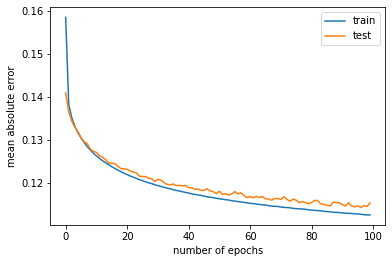

In [50]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("mean absolute error")
plt.show()

In [51]:
y_prediction = model.predict(x_normalized)

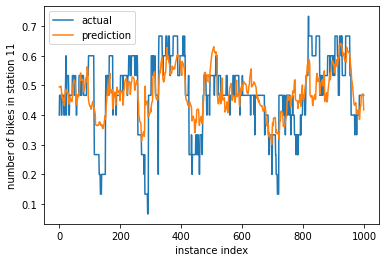

In [61]:
station = 11
plt.plot(y.values[1000:2000, station], label="actual")
plt.plot(y_prediction[1000:2000, station], label="prediction")
plt.legend()
plt.xlabel("instance index")
plt.ylabel("number of bikes in station {}".format(station))
plt.show()

### Weather history

In [53]:
x = pd.read_csv("https://repo.ijs.si/hribarr/tetramax_keras_data/-/raw/master/time_and_weather.csv")
y = pd.read_csv("https://repo.ijs.si/hribarr/tetramax_keras_data/-/raw/master/num_of_bicycles.csv")

First we expand the data set so that there are no holes in the data and we put nan where we dont have any instances.

In [54]:
# Function that adds a next hour to the data frame.
def add_instance(df):
  last_instance = df.iloc[-1]
  last_hour = int(last_instance.hour)
  last_day_of_the_week = int(last_instance.day_of_the_week)
  last_day_of_the_year = int(last_instance.day_of_the_year)
  last_year = int(last_instance.year)
  new_hour = last_hour + 1
  if new_hour == 24:
    new_hour = 0
    new_day_of_the_week = last_day_of_the_week + 1
    new_day_of_the_year = last_day_of_the_year + 1
    if new_day_of_the_week == 7:
      new_day_of_the_week = 0
    if new_day_of_the_year == 366:
      new_day_of_the_year = 1
      new_year = last_year + 1
    else:
      new_year = last_year
  else:
    new_day_of_the_week = last_day_of_the_week
    new_day_of_the_year = last_day_of_the_year
    new_year = last_year
  new_instance = pd.DataFrame({"year": [new_year], 
                               "day_of_the_year": [new_day_of_the_year], 
                               "day_of_the_week": [new_day_of_the_week],
                               "hour": [new_hour]}, dtype=np.int64)
  return df.append(new_instance), new_year, new_day_of_the_year, new_hour

first_instance = x.iloc[0]
first_hour = int(first_instance.hour)
first_day_of_the_week = int(first_instance.day_of_the_week)
first_day_of_the_year = int(first_instance.day_of_the_year)
first_year = int(first_instance.year)
df = pd.DataFrame({"year": [first_year], 
                   "day_of_the_year": [first_day_of_the_year], 
                   "day_of_the_week": [first_day_of_the_week],
                   "hour": [first_hour]}, dtype=np.int64)

last_instance = x.iloc[-1]
last_hour = int(last_instance.hour)
last_day_of_the_week = int(last_instance.day_of_the_week)
last_day_of_the_year = int(last_instance.day_of_the_year)
last_year = int(last_instance.year)
while True:
  df, new_year, new_day_of_the_year, new_hour = add_instance(df)
  if new_year == 2015 and new_day_of_the_year == 243 and new_hour == 23:
    break
# We merge df that have all times with x and y.
data = pd.merge(df, pd.merge(x, y, left_index=True, right_index=True), on=["year", "day_of_the_year", "day_of_the_week", "hour"], how="left")
columns_in_x = [col for col in data.columns if not col.startswith("station_")]
columns_in_y = [col for col in data.columns if col.startswith("station_")]
x = data[columns_in_x]
y = data[columns_in_y]
# We interpolate the weather features on missing values.
x = x.interpolate(method="nearest")

Now we can add past weather features.

In [55]:
weather_columns = ["mean_temperature_f",
                   "mean_humidity",
                   "mean_sea_level_pressure_inches",
                   "mean_visibility_miles",
                   "mean_wind_speed_mph",
                   "max_gust_speed_mph",
                   "precipitation_inches",
                   "cloud_cover"]
# We add shifted features so that the model knows the weather history.
history_days = 2
for column in weather_columns:
    for shift in [24 * x for x in range(1, history_days + 1)]:
        new_column = column + "_shift_" + str(shift)
        x[new_column] = x[column].shift(shift)
# We drop nan rows.
data = pd.merge(x, y, left_index=True, right_index=True)
data = data.dropna()
columns_in_x = [col for col in data.columns if not col.startswith("station_")]
columns_in_y = [col for col in data.columns if col.startswith("station_")]
x = data[columns_in_x]
y = data[columns_in_y]

We transform features in the same manner as before

In [56]:
# We smoothen time features.
x["time_of_the_day"] = x.hour / 24
x["time_of_the_week"] = ( x.day_of_the_week + x.time_of_the_day ) / 7
x["time_of_the_year"] = ( x.day_of_the_year - 1 + x.time_of_the_day ) / 365
x["time_in_years"] = x.year + x.time_of_the_year
x = x.drop(['year', 'day_of_the_year', 'day_of_the_week', 'hour'], axis=1)
# We transform periodic time features to cyclic features.
periodic_columns = ["time_of_the_day", "time_of_the_week", "time_of_the_year"]
for column in periodic_columns:
    x[column + "_sin"] = np.sin(2 * np.pi * x[column])
    x[column + "_cos"] = np.cos(2 * np.pi * x[column])
x = x.drop(periodic_columns, axis=1)
# We split to train and test set.
data = pd.merge(x, y, left_index=True, right_index=True)
train, test = train_test_split(data, test_size=0.2)
columns_in_x = [col for col in data.columns if not col.startswith("station_")]
columns_in_y = [col for col in data.columns if col.startswith("station_")]
x_train = train[columns_in_x]
y_train = train[columns_in_y]
x_test = test[columns_in_x]
y_test = test[columns_in_y]
# We normalize features that are not periodic.
columns_for_normalization = ["time_in_years"] + weather_columns + \
  [column + "_shift_" + str(24 * shift) for column in weather_columns for shift in range(1, history_days + 1)]
x_train_normalized = x_train.copy()
x_test_normalized = x_test.copy()
x_normalized = x.copy()
x_train_min = x_train[columns_for_normalization].min()
x_train_max = x_train[columns_for_normalization].max()
x_train_normalized[columns_for_normalization] = (x_train[columns_for_normalization] - x_train_min) / (x_train_max - x_train_min)
x_test_normalized[columns_for_normalization] = (x_test[columns_for_normalization] - x_train_min) / (x_train_max - x_train_min)
x_normalized[columns_for_normalization] = (x[columns_for_normalization] - x_train_min) / (x_train_max - x_train_min)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [57]:
input_dim = x.columns.size
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, input_dim=input_dim, activation="relu"))
model.add(Dense(output_dim))
model.compile(loss="mae")
history = model.fit(x=x_train_normalized, y=y_train, epochs=100, validation_data=(x_test_normalized, y_test))

Epoch 1/100
261/261 [==============================] - 2s 4ms/step - loss: 0.1610 - val_loss: 0.1437
Epoch 2/100
261/261 [==============================] - 1s 3ms/step - loss: 0.1415 - val_loss: 0.1355
Epoch 3/100
261/261 [==============================] - 1s 2ms/step - loss: 0.1363 - val_loss: 0.1321
Epoch 4/100
261/261 [==============================] - 1s 3ms/step - loss: 0.1328 - val_loss: 0.1296
Epoch 5/100
261/261 [==============================] - 1s 2ms/step - loss: 0.1300 - val_loss: 0.1276
Epoch 6/100
261/261 [==============================] - 1s 3ms/step - loss: 0.1278 - val_loss: 0.1257
Epoch 7/100
261/261 [==============================] - 1s 3ms/step - loss: 0.1259 - val_loss: 0.1234
Epoch 8/100
261/261 [==============================] - 1s 2ms/step - loss: 0.1243 - val_loss: 0.1215
Epoch 9/100
261/261 [==============================] - 1s 3ms/step - loss: 0.1228 - val_loss: 0.1202
Epoch 10/100
261/261 [==============================] - 1s 3ms/step - loss: 0.1216 - val_lo

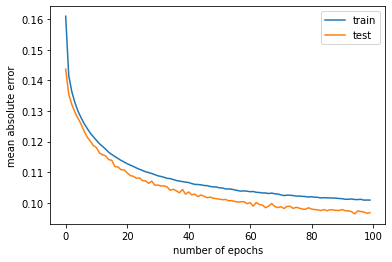

In [58]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("mean absolute error")
plt.show()

In [59]:
y_prediction = model.predict(x_normalized)

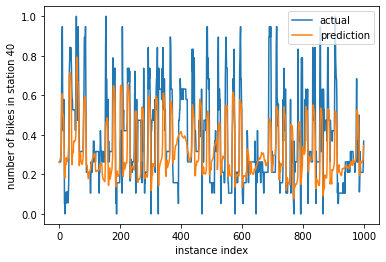

In [60]:
station = 40
plt.plot(y.values[1000:2000, station], label="actual")
plt.plot(y_prediction[1000:2000, station], label="prediction")
plt.legend()
plt.xlabel("instance index")
plt.ylabel("number of bikes in station {}".format(station))
plt.show()

To find out which features are more useful and which are not I propose the use of [shap](https://github.com/slundberg/shap).

## Multitask learning

In this problem we predicted several values at the same time. This helps a lot because the network has access to more information. This is beneficial technique even when we do not need some of the outputs, however, we do have that information available.

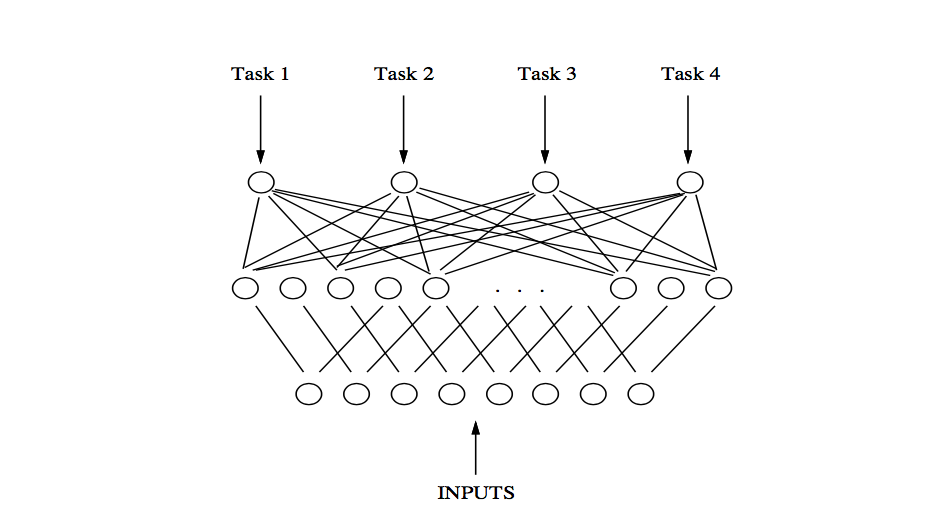